In [1]:
import netpixi
from netpixi.integration.gt import *
from regression.integration.gt import *
import pandas as pd
import numpy as np
import seaborn as sns
import regression as reg
from scipy import stats
from matplotlib import pyplot as plt

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


In [2]:
g = gt_load('mangas_6.net.gz')

In [4]:
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'mangas_6.net.gz')
g = gt_load('mangas_6.net.gz')
graph = netpixi.render('mangas_6.net.gz', infinite=True);

In [5]:
#Ajustando propriedades
graph.vertex_default(size=5)
graph.edge_default( width=1)

### Quantidade de vértices e arestas

In [6]:
n = g.num_vertices()
print("Número de vértices:", n)

m = g.num_edges()
print("Número de arestas:", m)

Número de vértices: 1082
Número de arestas: 38916


### Densidade

In [7]:
nv = g.num_vertices()
na = g.num_edges()

if g.is_directed():
    max_edges = nv * (nv - 1)
else:
    max_edges = nv * (nv - 1) // 2

d = na/max_edges

print(f"Densidade da rede: {d}")

Densidade da rede: 0.066543438077634


### Análise exploratória

In [8]:
data = gt_data(g)
data

,manga_name,clustering,degree,betweenness,closeness
id,,,,,
0,Classroom of the Elite (Light Novel),0.558824,0.015726,1.453635e-03,0.308417
1,Bastard,1.000000,0.001850,0.000000e+00,0.168564
2,I’m Really Not the Devil’s Lackey,0.590698,0.079556,1.258542e-03,0.371733
3,10 Years That I Loved You the Most,0.400000,0.004625,1.146598e-04,0.315436
4,Mage & Demon Queen - Part 2,0.800000,0.004625,6.485727e-07,0.305540
...,...,...,...,...,...
1077,Kyuusen no Shima,0.000000,0.000925,0.000000e+00,0.209781
1078,Friendship Pregnancy Triangle,0.596210,0.147086,7.294790e-04,0.390958
1079,Taikoku Cheat nara Isekai Seifuku mo Rakushou ...,0.529644,0.021277,1.620978e-04,0.295113


In [9]:
in_degrees = []
for v in g.all_vertices():
    in_degrees.append(v.in_degree())

out_degrees = []
for v in g.all_vertices():
    out_degrees.append(v.out_degree())

degrees = []
for v in g.all_vertices():
    degrees.append(v.total_degree())
    
data['in_degree'] = in_degrees
data['out_degree'] = out_degrees
data['degree'] = degrees
data

,manga_name,clustering,degree,betweenness,closeness,in_degree,out_degree
id,,,,,,,
0,Classroom of the Elite (Light Novel),0.558824,17,1.453635e-03,0.308417,0,17
1,Bastard,1.000000,2,0.000000e+00,0.168564,0,2
2,I’m Really Not the Devil’s Lackey,0.590698,86,1.258542e-03,0.371733,0,86
3,10 Years That I Loved You the Most,0.400000,5,1.146598e-04,0.315436,0,5
4,Mage & Demon Queen - Part 2,0.800000,5,6.485727e-07,0.305540,0,5
...,...,...,...,...,...,...,...
1077,Kyuusen no Shima,0.000000,1,0.000000e+00,0.209781,0,1
1078,Friendship Pregnancy Triangle,0.596210,159,7.294790e-04,0.390958,0,159
1079,Taikoku Cheat nara Isekai Seifuku mo Rakushou ...,0.529644,23,1.620978e-04,0.295113,0,23


count    1082.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: in_degree, dtype: float64

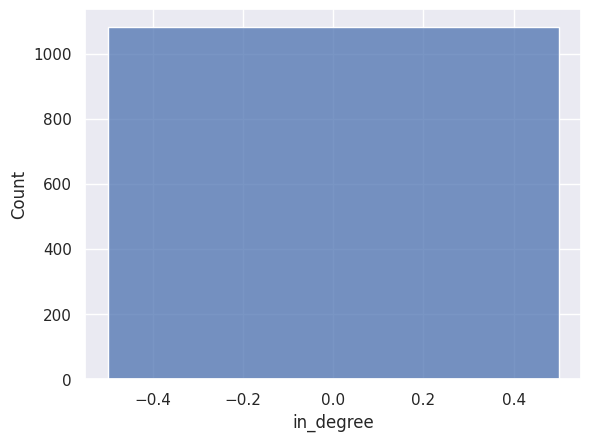

In [10]:
# in_degree
sns.histplot(data['in_degree'])
data['in_degree'].describe()

count    1082.000000
mean       71.933457
std        57.306366
min         1.000000
25%        24.000000
50%        57.500000
75%       110.000000
max       288.000000
Name: out_degree, dtype: float64

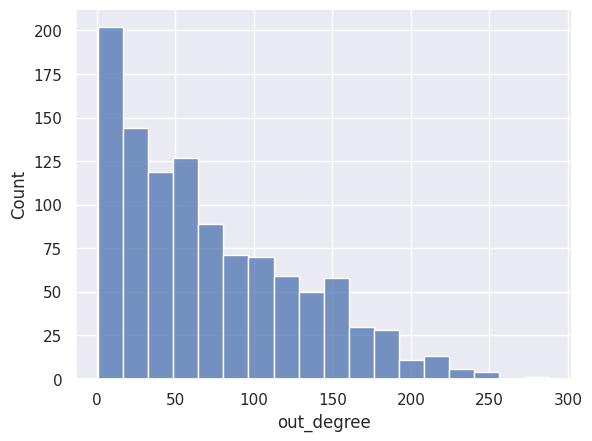

In [11]:
# out_degree
sns.histplot(data['out_degree'])
data['out_degree'].describe()

count    1082.000000
mean       71.933457
std        57.306366
min         1.000000
25%        24.000000
50%        57.500000
75%       110.000000
max       288.000000
Name: degree, dtype: float64

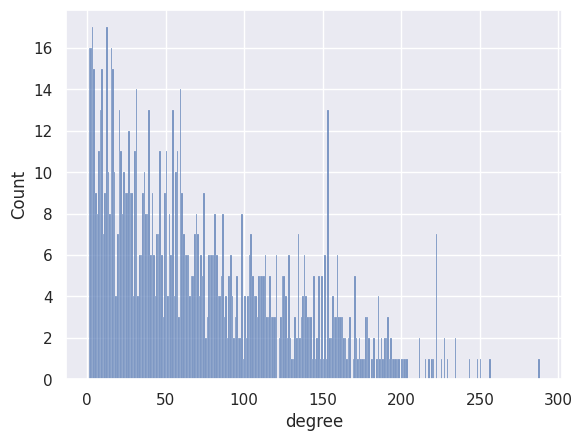

In [12]:
# degree
sns.histplot(data['degree'], binwidth=1)
data['degree'].describe()

In [13]:
from graph_tool import clustering, centrality

# Clustering
lc = clustering.local_clustering(g)
g.add_vp('clustering', lc)

# Degree
dc = gt_total_degree(g)
g.add_vp('degree', dc)

# Betweenness
bt, _ = centrality.betweenness(g)
g.add_vp('betweenness', bt)

# Closeness
cc = centrality.closeness(g)
g.add_vp('closeness', cc)

data = gt_data(g)
data.describe()

,clustering,degree,betweenness,closeness
count,1082.000000,1082.000000,1082.000000,1082.000000
mean,0.554614,0.066543,0.001740,0.357080
std,0.173520,0.053012,0.003362,0.055122
min,0.000000,0.000925,0.000000,0.168538
25%,0.459657,0.022202,0.000140,0.323362
50%,0.558573,0.053191,0.000633,0.359913
75%,0.663439,0.101758,0.001840,0.398158
max,1.000000,0.266420,0.032288,0.489805


#### Adcionando a popularidade de cada anime

In [14]:
popular = pd.read_csv('popular.csv')
popular_faltantes = pd.read_csv('popular_faltantes.csv')

def getNumPopular(value):
    try:
        return value.split(' ')[5].replace(',','')
    except:
        return value
    
popular["Value"] = popular["Value"].apply(getNumPopular)
popular_faltantes["Value"] = popular_faltantes["Value"].apply(getNumPopular)


popular_manga = dict(zip(popular["Book Title"], popular["Value"]))
popular_faltante_manga = dict(zip(popular_faltantes["Book Title"], popular_faltantes["Value"]))

for key in popular_faltante_manga.keys():
    value = popular_faltante_manga[key]
    popular_manga[key] = value
    
data["Popularidade"] = data['manga_name'].map(popular_manga)
data['Popularidade'] = data['Popularidade'].astype(int)
data

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


,manga_name,clustering,degree,betweenness,closeness,Popularidade
id,,,,,,
0,Classroom of the Elite (Light Novel),0.558824,0.015726,1.453635e-03,0.308417,725
1,Bastard,1.000000,0.001850,0.000000e+00,0.168564,6025
2,I’m Really Not the Devil’s Lackey,0.590698,0.079556,1.258542e-03,0.371733,1426
3,10 Years That I Loved You the Most,0.400000,0.004625,1.146598e-04,0.315436,1703
4,Mage & Demon Queen - Part 2,0.800000,0.004625,6.485727e-07,0.305540,1343
...,...,...,...,...,...,...
1077,Kyuusen no Shima,0.000000,0.000925,0.000000e+00,0.209781,160
1078,Friendship Pregnancy Triangle,0.596210,0.147086,7.294790e-04,0.390958,177
1079,Taikoku Cheat nara Isekai Seifuku mo Rakushou ...,0.529644,0.021277,1.620978e-04,0.295113,75


#### Adcionando o _rating_ de cada anime

In [15]:
df = pd.read_csv('data.csv')

rating_manga = dict(zip(df["title"], df["rating"]))

data["Rating"] = data['manga_name'].map(rating_manga)
data

,manga_name,clustering,degree,betweenness,closeness,Popularidade,Rating
id,,,,,,,
0,Classroom of the Elite (Light Novel),0.558824,0.015726,1.453635e-03,0.308417,725,4.7
1,Bastard,1.000000,0.001850,0.000000e+00,0.168564,6025,4.7
2,I’m Really Not the Devil’s Lackey,0.590698,0.079556,1.258542e-03,0.371733,1426,4.7
3,10 Years That I Loved You the Most,0.400000,0.004625,1.146598e-04,0.315436,1703,4.6
4,Mage & Demon Queen - Part 2,0.800000,0.004625,6.485727e-07,0.305540,1343,4.6
...,...,...,...,...,...,...,...
1077,Kyuusen no Shima,0.000000,0.000925,0.000000e+00,0.209781,160,2.8
1078,Friendship Pregnancy Triangle,0.596210,0.147086,7.294790e-04,0.390958,177,2.8
1079,Taikoku Cheat nara Isekai Seifuku mo Rakushou ...,0.529644,0.021277,1.620978e-04,0.295113,75,2.8


#### Adcionando o ano de lançamento de cada anime

In [16]:
df = pd.read_csv('data.csv')

rating_manga = dict(zip(df["title"], df["year"]))

data["year"] = data['manga_name'].map(rating_manga)
data['year'] = data['year'].astype(int)

data

,manga_name,clustering,degree,betweenness,closeness,Popularidade,Rating,year
id,,,,,,,,
0,Classroom of the Elite (Light Novel),0.558824,0.015726,1.453635e-03,0.308417,725,4.7,2015
1,Bastard,1.000000,0.001850,0.000000e+00,0.168564,6025,4.7,2014
2,I’m Really Not the Devil’s Lackey,0.590698,0.079556,1.258542e-03,0.371733,1426,4.7,2021
3,10 Years That I Loved You the Most,0.400000,0.004625,1.146598e-04,0.315436,1703,4.6,2018
4,Mage & Demon Queen - Part 2,0.800000,0.004625,6.485727e-07,0.305540,1343,4.6,2019
...,...,...,...,...,...,...,...,...
1077,Kyuusen no Shima,0.000000,0.000925,0.000000e+00,0.209781,160,2.8,2012
1078,Friendship Pregnancy Triangle,0.596210,0.147086,7.294790e-04,0.390958,177,2.8,2019
1079,Taikoku Cheat nara Isekai Seifuku mo Rakushou ...,0.529644,0.021277,1.620978e-04,0.295113,75,2.8,2018


#### Adcionando as tags de cada anime

In [17]:
df = pd.read_csv('data.csv')

rating_manga = dict(zip(df["title"], df["tags"]))

data["tags"] = data['manga_name'].map(rating_manga)

data

,manga_name,clustering,degree,betweenness,closeness,Popularidade,Rating,year,tags
id,,,,,,,,,
0,Classroom of the Elite (Light Novel),0.558824,0.015726,1.453635e-03,0.308417,725,4.7,2015,"['Comedy', 'Drama', 'Ecchi', 'Harem', 'Light N..."
1,Bastard,1.000000,0.001850,0.000000e+00,0.168564,6025,4.7,2014,"['Drama', 'Horror', 'Manhwa', 'Romance', 'Webt..."
2,I’m Really Not the Devil’s Lackey,0.590698,0.079556,1.258542e-03,0.371733,1426,4.7,2021,"['Fantasy', 'Manhua', 'Webtoons', 'Bookstore',..."
3,10 Years That I Loved You the Most,0.400000,0.004625,1.146598e-04,0.315436,1703,4.6,2018,"['BL', 'Drama', 'Manhua', 'Slice of Life', 'We..."
4,Mage & Demon Queen - Part 2,0.800000,0.004625,6.485727e-07,0.305540,1343,4.6,2019,"['Comedy', 'Fantasy', 'GL', 'OEL', 'Romance', ..."
...,...,...,...,...,...,...,...,...,...
1077,Kyuusen no Shima,0.000000,0.000925,0.000000e+00,0.209781,160,2.8,2012,"['Drama', 'Ecchi', 'Horror', 'Mystery', 'Roman..."
1078,Friendship Pregnancy Triangle,0.596210,0.147086,7.294790e-04,0.390958,177,2.8,2019,"['BL', 'Drama', 'Romance', 'Yaoi', 'Adult Coup..."
1079,Taikoku Cheat nara Isekai Seifuku mo Rakushou ...,0.529644,0.021277,1.620978e-04,0.295113,75,2.8,2018,"['Comedy', 'Ecchi', 'Fantasy', 'Harem', 'Iseka..."


In [18]:
tags = data.tags.to_list()

for tag in tags:
    tag = eval(tag)
    for i in tag:
        if i == 'seinen' or i == 'Seinen' or i == 'josei' or i == 'Josei':
            print(tag)


['Action', 'Adventure', 'Comedy', 'Drama', 'Seinen', 'Dark Comedy', 'Historical', 'Treasure Hunters', 'Animal Abuse', 'Explicit Violence', 'Mature Themes', 'Nudity', 'Sexual Content', 'Adapted to Anime']
['Action', 'Adventure', 'Drama', 'Fantasy', 'Seinen', 'Guns', 'Isekai', 'Medieval', 'Military', 'Person in a Strange World', 'Political', 'War', 'Explicit Sex', 'Explicit Violence', 'Mature Themes', 'Physical Abuse', 'Sexual Abuse', 'Adapted to Anime', 'Based on a Light Novel']
['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'GL', 'Romance', 'Seinen', 'Shoujo-ai', 'Isekai', 'Magic', 'Medieval', 'Opposites Attract', 'Person in a Strange World', 'Reincarnation', 'Royalty', 'Violence', 'Based on a Light Novel']
['Drama', 'GL', 'Josei', 'Romance', 'Slice of Life', 'Yuri', 'Adult Couples', 'LGBT Themes', 'Mature Romance', 'Pregnancy', 'Mature Themes', 'Nudity', 'Physical Abuse', 'Sexual Content', 'Domestic Abuse']
['Adventure', 'Ecchi', 'Fantasy', 'Seinen', 'Cancelled', 'Isekai', 'NEE

In [19]:
data

,manga_name,clustering,degree,betweenness,closeness,Popularidade,Rating,year,tags
id,,,,,,,,,
0,Classroom of the Elite (Light Novel),0.558824,0.015726,1.453635e-03,0.308417,725,4.7,2015,"['Comedy', 'Drama', 'Ecchi', 'Harem', 'Light N..."
1,Bastard,1.000000,0.001850,0.000000e+00,0.168564,6025,4.7,2014,"['Drama', 'Horror', 'Manhwa', 'Romance', 'Webt..."
2,I’m Really Not the Devil’s Lackey,0.590698,0.079556,1.258542e-03,0.371733,1426,4.7,2021,"['Fantasy', 'Manhua', 'Webtoons', 'Bookstore',..."
3,10 Years That I Loved You the Most,0.400000,0.004625,1.146598e-04,0.315436,1703,4.6,2018,"['BL', 'Drama', 'Manhua', 'Slice of Life', 'We..."
4,Mage & Demon Queen - Part 2,0.800000,0.004625,6.485727e-07,0.305540,1343,4.6,2019,"['Comedy', 'Fantasy', 'GL', 'OEL', 'Romance', ..."
...,...,...,...,...,...,...,...,...,...
1077,Kyuusen no Shima,0.000000,0.000925,0.000000e+00,0.209781,160,2.8,2012,"['Drama', 'Ecchi', 'Horror', 'Mystery', 'Roman..."
1078,Friendship Pregnancy Triangle,0.596210,0.147086,7.294790e-04,0.390958,177,2.8,2019,"['BL', 'Drama', 'Romance', 'Yaoi', 'Adult Coup..."
1079,Taikoku Cheat nara Isekai Seifuku mo Rakushou ...,0.529644,0.021277,1.620978e-04,0.295113,75,2.8,2018,"['Comedy', 'Ecchi', 'Fantasy', 'Harem', 'Iseka..."


### Regressão

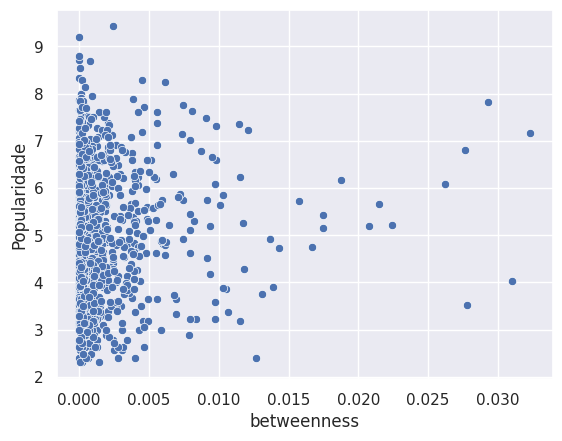

In [20]:
sns.scatterplot(x=data['betweenness'], y=np.log(data['Popularidade']));

In [21]:
result = reg.linear(data=data, formula='np.log(Popularidade) ~ betweenness')

In [22]:
result.micro_summary()

variable,coefficient,std error,p-value
betweenness,27.201393,11.906402,0.022529


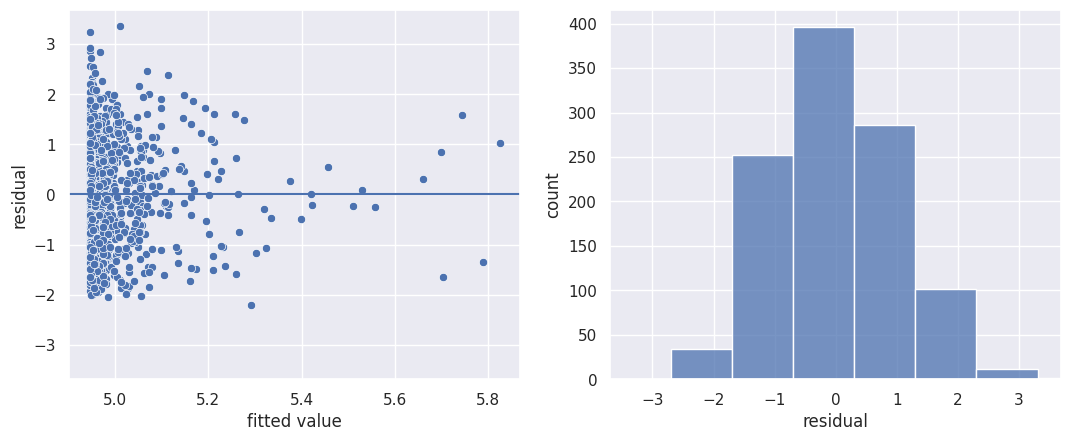

In [23]:
result.plot_residuals()

#### Adcionando o _rating_ como variável de controle

In [24]:
result = reg.linear(data=data, formula='np.log(Popularidade) ~ betweenness + Rating')

In [25]:
result.micro_summary()

variable,coefficient,std error,p-value
betweenness,19.606387,11.133975,0.078530
Rating,1.111986,0.088004,0.000000


In [26]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Popularidade)   R-squared:                       0.133
Model:                              OLS   Adj. R-squared:                  0.131
Method:                   Least Squares   F-statistic:                     82.82
Date:                  Mon, 12 Jun 2023   Prob (F-statistic):           3.45e-34
Time:                          19:38:39   Log-Likelihood:                -1756.8
No. Observations:                  1082   AIC:                             3520.
Df Residuals:                      1079   BIC:                             3535.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6197      0.345      1.796      0.073      -0.057       1.297
betweenness    19.6064     11.134      1.761      0.079      -2.240      41.453
Rating          1.1120      0.088     12.636      0.000       0.939       1.285
==============================================================================
Omnibus:                       21.157   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.673
Skew:                          -0.132   Prob(JB):                      0.00107
Kurtosis:                       2.517   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
result.micro_summary()

variable,coefficient,std error,p-value
betweenness,19.606387,11.133975,0.078530
Rating,1.111986,0.088004,0.000000


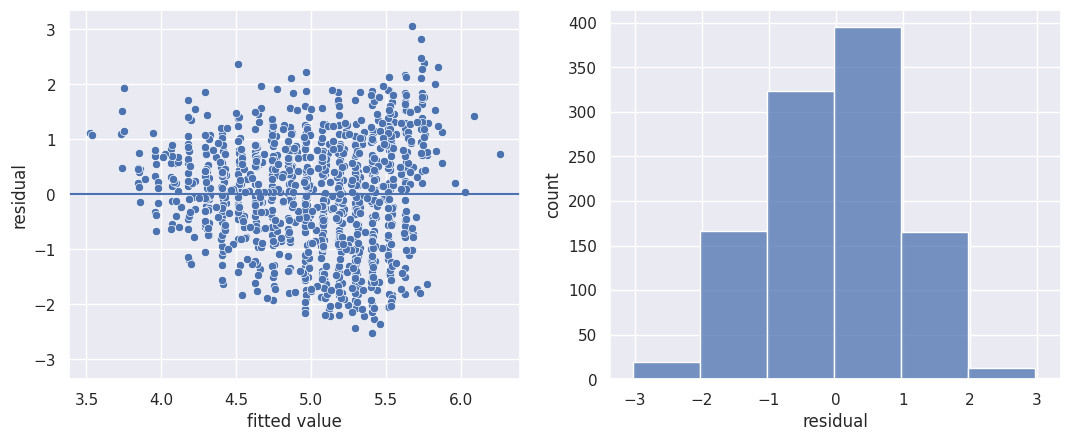

In [28]:
result.plot_residuals()

### Recortes

In [29]:
data_recorte = data[data['Popularidade'] <= 3000]
data_antes2010  = data_recorte[data_recorte['year'] <= 2010]

#### Mangas lançados antes de 2010

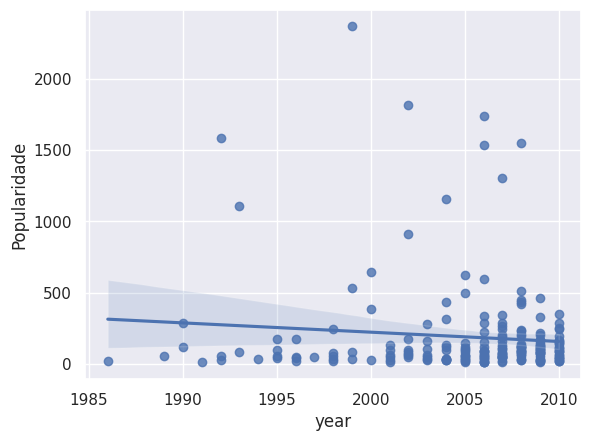

In [30]:
sns.regplot(x=data_antes2010['year'], y=data_antes2010['Popularidade']);

In [31]:
result = reg.linear(data=data_antes2010, formula='Q("Popularidade") ~ year')
result.micro_summary()

variable,coefficient,std error,p-value
year,-6.504137,4.672134,0.165404


#### Mangas para pessoas mais velhas (Seinen, Josei)

In [32]:
tags = data.tags.to_list()
seinen_josei = []
for tag in tags:
    tag = eval(tag)
    if 'seinen' in tag or 'Seinen' in tag or 'josei' in tag or 'Jeinen' in tag:
        seinen_josei.append(1)
    else:
        seinen_josei.append(0)

data['Seinen|Josei'] = seinen_josei

data_seinen_josei = data.loc[data['Seinen|Josei'] == 1].reset_index(drop=True)
data_seinen_josei.head()

,manga_name,clustering,degree,betweenness,closeness,Popularidade,Rating,year,tags,Seinen|Josei
0,Golden Kamuy,0.000000,0.001850,0.000056,0.224507,745,4.6,2014,"['Action', 'Adventure', 'Comedy', 'Drama', 'Se...",1
1,GATE: Where the JSDF Fought,0.333333,0.002775,0.001276,0.214442,987,4.5,2011,"['Action', 'Adventure', 'Drama', 'Fantasy', 'S...",1
2,The Magical Revolution of the Reincarnated Pri...,0.409091,0.011101,0.001208,0.287576,509,4.5,2020,"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",1
3,No Game No Life,0.700000,0.004625,0.000011,0.256892,797,4.4,2013,"['Adventure', 'Ecchi', 'Fantasy', 'Seinen', 'C...",1
4,Manly Appetites: Minegishi Loves Otsu,0.500000,0.007401,0.000008,0.291453,299,4.4,2019,"['BL', 'Comedy', 'Romance', 'Seinen', 'Shounen...",1


In [33]:
result = reg.linear(data=data_seinen_josei, formula='np.log(Popularidade) ~ betweenness + Rating')

In [34]:
result.micro_summary()

variable,coefficient,std error,p-value
betweenness,-31.022532,34.059355,0.366933
Rating,0.703511,0.317680,0.031574


### Vamos fazer os 8 recortes

In [35]:
mangas_2010 = data_antes2010['manga_name'].to_list()
mangas_publicoAdulto = data_seinen_josei['manga_name'].to_list()

def is_not_in(column, values):
    return ~column.isin(values)

len(mangas_2010), len(mangas_publicoAdulto)

(206, 51)

In [36]:
#SOMENTE Mangas destinados a um público mais velho (Seinen e Josei)
#SOMENTE Mangas com data de lançamentos antes de 2010

x = data[data['manga_name'].isin(mangas_2010 + mangas_publicoAdulto)]

result = reg.linear(data=x, formula='np.log(Popularidade) ~ betweenness + Rating')
result.micro_summary()

variable,coefficient,std error,p-value
betweenness,9.745193,18.730034,0.603326
Rating,1.089466,0.152532,0.000000


In [37]:
#SOMENTE Mangas destinados a um público mais velho (Seinen e Josei)
#TUDO EXCETO Mangas com data de lançamentos antes de 2010

x = data[data['manga_name'].isin(mangas_publicoAdulto)]
x = x[is_not_in(x['manga_name'], mangas_2010)]


result = reg.linear(data=x, formula='np.log(Popularidade) ~ betweenness + Rating')
result.micro_summary()

variable,coefficient,std error,p-value
betweenness,-10.197493,40.059593,0.800402
Rating,0.656626,0.363421,0.078515


In [38]:
#TUDO EXCETO Mangas destinados a um público mais velho (Seinen e Josei)
#SOMENTE Mangas com data de lançamentos antes de 2010

x = data[data['manga_name'].isin(mangas_2010)]
x = x[is_not_in(x['manga_name'], mangas_publicoAdulto)]

result = reg.linear(data=x, formula='np.log(Popularidade) ~ betweenness + Rating')
result.micro_summary()

variable,coefficient,std error,p-value
betweenness,14.204798,21.355801,0.506745
Rating,1.089736,0.167243,0.000000


In [39]:
#TUDO EXCETO Mangas destinados a um público mais velho (Seinen e Josei)
#TUDO EXCETO Mangas com data de lançamentos antes de 2010

x = data[is_not_in(data['manga_name'], mangas_2010 + mangas_publicoAdulto)]

result = reg.linear(data=x, formula='np.log(Popularidade) ~ betweenness + Rating')
result.micro_summary()

variable,coefficient,std error,p-value
betweenness,22.600224,13.396087,0.091964
Rating,1.095693,0.110366,0.000000


In [40]:
#TUDO
#TUDO EXCETO Mangas destinados a um público mais velho (Seinen e Josei)

x = data[is_not_in(data['manga_name'], mangas_publicoAdulto)]

result = reg.linear(data=x, formula='np.log(Popularidade) ~ betweenness + Rating')
result.micro_summary()

variable,coefficient,std error,p-value
betweenness,21.776646,11.587337,0.060480
Rating,1.146623,0.090853,0.000000


In [41]:
#TUDO
#TUDO EXCETO Mangas com data de lançamentos antes de 2010

x = data[is_not_in(data['manga_name'], mangas_2010)]

result = reg.linear(data=x, formula='np.log(Popularidade) ~ betweenness + Rating')
result.micro_summary()

variable,coefficient,std error,p-value
betweenness,21.314107,12.877108,0.098245
Rating,1.051152,0.106334,0.000000
